Выполнила: `Кызыл-оол Монгун-Ай ПМ22-6`

## Домашняяя работа

__Цель:__ Разработать простую рекомендательную систему, которая будет
рекомендовать пользователям самые популярные товары на основе имеющихся
данных о продажах или взаимодействии с товарами, и проанализировать ее
эффективность.

__Задачи:__
1. Подготовка данных: создать или использовать существующий
датасет с данными о товарах, их продажах или оценках.
Датасет должен содержать:
- идентификаторы товаров
- информацию о продажах или оценках
- другую релевантную информацию.
Необходимо использовать набор данных с информацией о продажах
товаров (например, количество покупок каждого товара) или о взаимодействии
пользователей с товарами (например, просмотры, клики, добавления в
корзину).

#### 1.1. Загрузка и предобработка данных:
Загрузите данные и очистите их (удалите дубликаты, обработайте
пропуски и т.д.).

**Retailrocket Recommender System Dataset:** Набор данных, собранный с реального веб-сайта электронной коммерции, включает информацию о поведении посетителей, таких как клики, добавления в корзину и транзакции, что позволяет анализировать взаимодействие пользователей с товарами.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("retailrocket/ecommerce-dataset")

print("Path to dataset files:", path)

100%|██████████| 291M/291M [00:05<00:00, 52.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/retailrocket/ecommerce-dataset/versions/2


In [ ]:
import pandas as pd

events_df = pd.read_csv(f'{path}/events.csv')
category_tree_df = pd.read_csv(f'{path}/category_tree.csv')
item_properties_1_df = pd.read_csv(f'{path}/item_properties_part1.csv')
item_properties_2_df = pd.read_csv(f'{path}/item_properties_part2.csv')

In [ ]:
print(events_df.info())
events_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB
None


,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN


In [ ]:
print(category_tree_df.info())
category_tree_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1669 non-null   int64  
 1   parentid    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.2 KB
None


,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0


In [ ]:
print(item_properties_1_df .info())
item_properties_1_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999999 entries, 0 to 10999998
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 335.7+ MB
None


,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566


In [ ]:
print(item_properties_2_df .info())
item_properties_2_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9275903 entries, 0 to 9275902
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 283.1+ MB
None


,timestamp,itemid,property,value
0,1433041200000,183478,561,769062
1,1439694000000,132256,976,n26.400 1135780
2,1435460400000,420307,921,1149317 1257525


In [ ]:
events_df.drop_duplicates(inplace=True)
category_tree_df.drop_duplicates(inplace=True)
item_properties_1_df.drop_duplicates(inplace=True)
item_properties_2_df.drop_duplicates(inplace=True)

In [ ]:
events_df.isna().sum()

,0
timestamp,0
visitorid,0
event,0
itemid,0
transactionid,2733184


In [ ]:
category_tree_df.isna().sum()

,0
categoryid,0
parentid,25


In [ ]:
item_properties_1_df.isna().sum()

,0
timestamp,0
itemid,0
property,0
value,0


In [ ]:
item_properties_2_df.isna().sum()

,0
timestamp,0
itemid,0
property,0
value,0


In [ ]:
category_tree_df.fillna({'parentid': -1}, inplace=True)  # Заполняем пропущенные parentid значением -1
category_tree_df.isna().sum()

,0
categoryid,0
parentid,0


#### 1.2. Анализ данных:
Проанализируйте данные, чтобы понять, какие товары наиболее
популярны (например, по количеству покупок или по частоте взаимодействия)

In [ ]:
popular_items = events_df['itemid'].value_counts().reset_index() # Количество взаимодействий с каждым товаром
popular_items.columns = ['itemid', 'interaction_count']

print(popular_items.head(10))

   itemid  interaction_count
0  187946               3412
1  461686               2975
2    5411               2334
3  370653               1854
4  219512               1800
5  257040               1647
6  298009               1642
7   96924               1633
8  309778               1628
9  384302               1608


In [ ]:
# Фильтруем только покупки
purchased_items = events_df[events_df['event'] == 'transaction']

# Количество покупок по товарам
popular_purchases = purchased_items['itemid'].value_counts().reset_index()
popular_purchases.columns = ['itemid', 'purchase_count']

# Выведем топ-10 самых покупаемых товаров
print(popular_purchases.head(10))

   itemid  purchase_count
0  461686             133
1  119736              97
2  213834              92
3  312728              46
4    7943              46
5  445351              45
6   48030              41
7  420960              38
8  248455              38
9   17478              37


In [ ]:
most_popular_item = popular_items.iloc[0]
print(f"Самый популярный товар: ID {most_popular_item['itemid']} с {most_popular_item['interaction_count']} взаимодействиями")

Самый популярный товар: ID 187946 с 3412 взаимодействиями


### 2. Реализация простой рекомендательной системы

Разработать простую систему рекомендаций, которая рекомендует
наиболее популярные товары на основе количества продаж или средней
оценки.

#### 2.1. Определите, какие товары являются самыми популярными (например, топ-10 товаров по количеству покупок). Можно использовать функции из задания 1.2.

In [ ]:
def get_top_popular_items(n=10):
    """
 топ-N популярных товаров по количеству покупок.
    """
    return popular_purchases.head(n)['itemid'].tolist()

top_items = get_top_popular_items(10)
print("Топ-10 популярных товаров:", top_items)

Топ-10 популярных товаров: [461686, 119736, 213834, 312728, 7943, 445351, 48030, 420960, 248455, 17478]


#### 2.2. Постройте простую рекомендательную систему, которая будет
рекомендовать эти популярные товары всем пользователям: реализуйте
функцию, которая принимает на вход ID пользователя и возвращает список
рекомендуемых товаров (например, топ- N популярных товаров).

In [ ]:
def recommend_items(user_id, n=10):
    """
  принимает ID пользователя и возвращает список рекомендуемых товаров.
    Здесь рекомендации одинаковы для всех пользователей — это самые популярные товары.
    """
    recommendations = get_top_popular_items(n)
    return {"user_id": user_id, "recommended_items": recommendations}

print(recommend_items(12345, 5))

{'user_id': 12345, 'recommended_items': [461686, 119736, 213834, 312728, 7943]}


### 3. Оценка и анализ
Оцените работу вашей рекомендательной системы. Для этого можно
использовать метрику точности (accuracy) на тестовом наборе данных.
Например, можно проверить, насколько часто товары из топ-N популярных
оказываются в списке покупок пользователей.

#### 3.1. Оценить эффективность системы на основе метрик, таких как
точность рекомендаций и удовлетворенность пользователей.

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(events_df, test_size=0.2, random_state=42)

# Отбираем все транзакции (купленные товары)
train_purchased_items = train_df[train_df['event'] == 'transaction']

# Считаем, сколько раз каждый товар был куплен
popular_purchases_train = train_purchased_items['itemid'].value_counts().reset_index()
popular_purchases_train.columns = ['itemid', 'purchase_count']


# Функция Precision@N
def precision_at_n(test_df, top_n):
    # Получаем список купленных товаров для каждого пользователя в тестовой выборке
    user_purchases = test_df[test_df['event'] == 'transaction'].groupby('visitorid')['itemid'].apply(set)

    # Получаем список самых популярных товаров (N товаров)
    top_items = set(get_top_popular_items(top_n))

    total_precision = 0
    count_users = 0

    # Перебираем каждого пользователя в тестовых данных
    for user, purchases in user_purchases.items():
        if len(purchases) == 0:
            continue  # Пропускаем пользователей без покупок
        count_users += 1
        total_precision += len(purchases.intersection(top_items)) / top_n  # Доля совпадений

    return total_precision / count_users if count_users > 0 else 0



# Функция Recall@N
def recall_at_n(test_df, top_n):
    # Группируем товары, купленные пользователями
    user_purchases = test_df[test_df['event'] == 'transaction'].groupby('visitorid')['itemid'].apply(set)

    # Берем топ-N популярных товаров
    top_items = set(get_top_popular_items(top_n))

    total_recall = 0
    count_users = 0

    for user, purchases in user_purchases.items():
        if len(purchases) == 0:
            continue  # Пропускаем пользователей без покупок
        count_users += 1
        total_recall += len(purchases.intersection(top_items)) / len(purchases)  # Доля найденных товаров

    return total_recall / count_users if count_users > 0 else 0



# Функция Coverage
def coverage(train_purchases, top_n):
    # Уникальные товары, которые покупали пользователи
    unique_purchased_items = set(train_purchases['itemid'].unique())

    # Уникальные товары, которые мы рекомендуем
    recommended_items = set(get_top_popular_items(top_n))

    # Доля рекомендованных товаров среди всех купленных
    return len(recommended_items.intersection(unique_purchased_items)) / len(unique_purchased_items)

# Вычисляем метрики
# Указываем N (количество рекомендаций)
top_n = 10

# Precision: % рекомендованных товаров, которые действительно купил пользователь
precision = precision_at_n(test_df, top_n)

# Recall: % купленных товаров, которые попали в рекомендации
recall = recall_at_n(test_df, top_n)

# Coverage: % всех товаров, которые покрываются рекомендациями
coverage_score = coverage(train_purchased_items, top_n)

# Вывод результатов
print(f"Precision@{top_n}: {precision:.4f}")
print(f"Recall@{top_n}: {recall:.4f}")
print(f"Coverage@{top_n}: {coverage_score:.4f}")

Precision@10: 0.0038
Recall@10: 0.0253
Coverage@10: 0.0010


#### 3.2. Сравнить результаты с другими простыми подходами, например,
случайными рекомендациями.

In [ ]:
import random

def random_recommendations(n=10):
    return random.sample(events_df['itemid'].unique().tolist(), n)

def precision_random(test_df, top_n, num_trials=10):
    total_precision = 0

    for _ in range(num_trials):
        random_items = set(random_recommendations(top_n))
        user_purchases = test_df[test_df['event'] == 'transaction'].groupby('visitorid')['itemid'].apply(set)

        correct_predictions = 0
        count_users = 0
        for user, purchases in user_purchases.items():
            if len(purchases) == 0:
                continue
            count_users += 1
            correct_predictions += len(purchases.intersection(random_items)) / top_n

        total_precision += correct_predictions / count_users if count_users > 0 else 0

    return total_precision / num_trials

random_precision = precision_random(test_df, top_n)

print(f"Random Precision@{top_n}: {random_precision}")

Random Precision@10: 2.9373368146214097e-05


### 4. Дополнительное задание (опционально): кастомизация
рекомендаций
Предложите улучшение системы за счёт добавления персонализации.
Например, можно учитывать категорию товаров, которые пользователь уже
просматривал или покупал, и рекомендовать ему популярные товары из этих
категорий.


In [ ]:
# Объединяем item_properties_1 и item_properties_2, чтобы получить категории товаров
item_properties_df = pd.concat([item_properties_1_df, item_properties_2_df])
item_properties_df = item_properties_df[item_properties_df['property'] == 'categoryid']
item_properties_df = item_properties_df[['itemid', 'value']].rename(columns={'value': 'categoryid'})

# Добавляем категории в events_df
events_with_categories = events_df.merge(item_properties_df, on='itemid', how='left')

# Определяем предпочитаемые категории пользователя
def get_user_favorite_categories(user_id, top_n=3):
    user_events = events_with_categories[events_with_categories['visitorid'] == user_id]
    category_counts = user_events['categoryid'].value_counts().reset_index()
    category_counts.columns = ['categoryid', 'count']

    return category_counts.head(top_n)['categoryid'].tolist()

# Получаем топ популярных товаров по категории
def get_top_items_by_category(categoryid, n=5):
    category_items = events_with_categories[events_with_categories['categoryid'] == categoryid]
    popular_items = category_items['itemid'].value_counts().reset_index()
    popular_items.columns = ['itemid', 'interaction_count']

    return popular_items.head(n)['itemid'].tolist()

# Функция персонализированной рекомендации
def recommend_personalized(user_id, top_n=10):
    favorite_categories = get_user_favorite_categories(user_id)

    recommendations = []
    for category in favorite_categories:
        recommendations.extend(get_top_items_by_category(category, n=top_n // len(favorite_categories)))

    return {"user_id": user_id, "recommended_items": recommendations[:top_n]}

In [ ]:
print(recommend_personalized(992329, 10))

{'user_id': 992329, 'recommended_items': [223829, 164035, 200082, 56323, 446820, 170390, 111403, 167399, 129796]}


## Пример

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("movies_metadata2.csv", encoding='latin-1')
df.head()

<ipython-input-2-560a4e8184d0>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("movies_metadata2.csv", encoding='latin-1')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

Построение простой рекомендательной системы.
Для этого необходимо выполнить следующие шаги:
1. Выбираем метрику (или оценку), по которой будем оценивать фильмы
2. Определяем условия, при которых фильм должен быть представлен в таблице.
3. Рассчитываем количество баллов для каждого фильма, удовлетворяющего условиям.
4. Выводим список фильмов в порядке убывания их оценок.

Применяются следующие правила:
v - количество голосов, набранных фильмом
m - минимальное количество голосов, необходимое для попадания фильма в чарт (необходимое условие)
R - средний рейтинг фильма
C - средний рейтинг всех фильмов в наборе данных



In [ ]:
# Применяются следующие правила:
# v - количество голосов, набранных фильмом.
# m - минимальное количество голосов, необходимое для попадания фильма в чарт (необходимое условие).
# R - средний рейтинг фильма.
# C - средний рейтинг всех фильмов в наборе данных.

# Вычисляем количество голосов, которое набрал фильм из 80-го процентиля
m = df['vote_count'].quantile(0.80)
m

50.0

In [ ]:
# Оставляем только фильмы, продолжительность которых больше 45 минут и меньше 300 минут
q_movies = df[(df['runtime'] >= 45) & (df['runtime'] <= 300)]

# Оставляем только фильмы, которые набрали голосов больше, чем m
q_movies = q_movies[q_movies['vote_count'] >= m]

# Проверяем количество фильмов, удовлетворяющих условиям
q_movies.shape

(8963, 24)

In [ ]:
# Вычисляем средний рейтинг всех фильмов
C = df['vote_average'].mean()
C

5.618207215134185

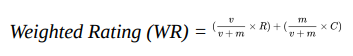

In [ ]:
# Функция для расчета взвешенного рейтинга IMDB для каждого фильма
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Вычисляем взвешенную оценку
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
# Вычисляем оценку, используя функцию weighted_rating, определенную выше
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

Отсортировываем DataFrame на основе только что вычисленной оценки и выводим список лучших фильмов

In [ ]:
# Сортируем фильмы по убыванию их оценок
q_movies = q_movies.sort_values('score', ascending=False)

# Выводим топ-25 лучших фильмов
q_movies[['title', 'vote_count', 'vote_average', 'score', 'runtime']].head(25)

,title,vote_count,vote_average,score,runtime
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.855148,190.0
314,The Shawshank Redemption,8358.0,8.5,8.482863,142.0
834,The Godfather,6024.0,8.5,8.476278,175.0
40251,Your Name.,1030.0,8.5,8.366584,106.0
12481,The Dark Knight,12269.0,8.3,8.289115,152.0
2843,Fight Club,9678.0,8.3,8.286216,139.0
292,Pulp Fiction,8670.0,8.3,8.284623,154.0
522,Schindler's List,4436.0,8.3,8.270109,195.0
23673,Whiplash,4376.0,8.3,8.269704,105.0
5481,Spirited Away,3968.0,8.3,8.266628,125.0
